In [1]:
#import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load data: CPS cleaned data from IPUMS for November 2006, 2011, 2016
data = pd.read_csv('IPUMS_CPS_Clean.csv')

# Check data importation
data.head()

## Model 1 - Is year an important feature on which to split?

In [39]:
# Create a feature matrix and target array from all the data 
X = data_enc2[['STATEFIP2',
                     'METRO2',
                     'FAMINC',
                      'AGE',
                      'OCC',
                      'IND',
                      'YRIMMIG2',
                      'RACE2',
                      'SEX2',
                      'MARST2',
                      'CITIZEN2',
                      'EDUC2',
                      'VETSTAT2',
                      'YEAR']]

Y = data_enc2['EMPSTAT2']

In [9]:
#Create a decision tree classifier (initial step)
model_all = tree.DecisionTreeClassifier()
model_all.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
#For the model with all the years, is year an important feature on which to split?
list(zip(X.columns, model_all.feature_importances_))

[('STATEFIP2', 0.07284657531044726),
 ('METRO2', 0.02653816929469322),
 ('FAMINC', 0.04606267453746448),
 ('AGE', 0.07001562289566),
 ('OCC', 0.035743297217047616),
 ('IND', 0.5642743927387073),
 ('YRIMMIG2', 0.012599565972254211),
 ('DIFFANY2', 0.04186216033772473),
 ('RACE2', 0.012911073464721718),
 ('SEX2', 0.012858132925493109),
 ('MARST2', 0.019688356911891334),
 ('CITIZEN2', 0.006009689281593116),
 ('EDUC2', 0.029778111804721077),
 ('SCHLCOLL2', 0.00680731724910323),
 ('VETSTAT2', 0.03195422930535203),
 ('YEAR', 0.010050630753125567)]

In [11]:
sorted(list(zip(X.columns, model_all.feature_importances_)), key = lambda x: -x[1])

[('IND', 0.5642743927387073),
 ('STATEFIP2', 0.07284657531044726),
 ('AGE', 0.07001562289566),
 ('FAMINC', 0.04606267453746448),
 ('DIFFANY2', 0.04186216033772473),
 ('OCC', 0.035743297217047616),
 ('VETSTAT2', 0.03195422930535203),
 ('EDUC2', 0.029778111804721077),
 ('METRO2', 0.02653816929469322),
 ('MARST2', 0.019688356911891334),
 ('RACE2', 0.012911073464721718),
 ('SEX2', 0.012858132925493109),
 ('YRIMMIG2', 0.012599565972254211),
 ('YEAR', 0.010050630753125567),
 ('SCHLCOLL2', 0.00680731724910323),
 ('CITIZEN2', 0.006009689281593116)]

## Method 2:  General Forest Classifier

In [12]:
# Split the data into a training set and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=3)
print('X train:', Xtrain.shape, '\ny train:', ytrain.shape)
print('X test:', Xtest.shape, '\ny test:', ytest.shape)

X train: (121065, 16) 
y train: (121065,)
X test: (40355, 16) 
y test: (40355,)


In [13]:
# Build a random forest classifier model
model_RFC_All = RandomForestClassifier(n_estimators=1000,random_state=0)

# Fit the model
model_RFC_All.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
# Predict and test accuracy
y_model_RFC_All = model_RFC_All.predict(Xtest)

accuracy_score(ytest, y_model_RFC_All)

0.9203320530293644

In [15]:
# Sort variable importances
sorted(list(zip(X.columns, model_RFC_All.feature_importances_)), key = lambda x: -x[1])

[('IND', 0.30996335068854364),
 ('OCC', 0.28082731313357295),
 ('AGE', 0.07293261362940148),
 ('STATEFIP2', 0.06802102511377454),
 ('FAMINC', 0.060516690075342404),
 ('DIFFANY2', 0.040387101893069745),
 ('EDUC2', 0.028946198797075075),
 ('METRO2', 0.025504018449289723),
 ('VETSTAT2', 0.020909869815157717),
 ('SEX2', 0.02004826090564637),
 ('MARST2', 0.01942370518285479),
 ('RACE2', 0.013139874823502783),
 ('YRIMMIG2', 0.012682297908172052),
 ('YEAR', 0.009904818791766126),
 ('CITIZEN2', 0.00855625149585939),
 ('SCHLCOLL2', 0.00823660929697117)]

## Method 3:  Compare Variable Importance in each year

In [16]:
# When we don't have the data already here, this is there cell where we will import the clean data.

In [40]:
# Check for missing data
dataset = [data2006, data2011, data2016]
for data in dataset:
    print(data.isnull().sum())

STATEFIP2    0
METRO2       0
FAMINC       0
AGE          0
OCC          0
IND          0
YRIMMIG2     0
RACE2        0
SEX2         0
MARST2       0
CITIZEN2     0
EDUC2        0
VETSTAT2     0
EMPSTAT2     0
dtype: int64
STATEFIP2    0
METRO2       0
FAMINC       0
AGE          0
OCC          0
IND          0
YRIMMIG2     0
RACE2        0
SEX2         0
MARST2       0
CITIZEN2     0
EDUC2        0
VETSTAT2     0
EMPSTAT2     0
dtype: int64
STATEFIP2    0
METRO2       0
FAMINC       0
AGE          0
OCC          0
IND          0
YRIMMIG2     0
RACE2        0
SEX2         0
MARST2       0
CITIZEN2     0
EDUC2        0
VETSTAT2     0
EMPSTAT2     0
dtype: int64


In [49]:
# Create list of datasets
dataset1 = [data2006, data2011, data2016]
dataset2 = [data2011, data2016, data2006]
dataset3 = [data2016, data2006, data2011]
yearlist1 = ['2006', '2011', '2016']
yearlist2 = ['2011', '2016', '2006']
yearlist3 = ['2016', '2006', '2011']

# Create a master variable importance dataframe
var = data2006.drop(['EMPSTAT2'],axis=1)
Var = pd.DataFrame(data=x)
importance_all = pd.DataFrame({'Variable_Name':Var.columns.values})

# Create a loop for all years
for data1,data2,data3,year1,year2,year3 in zip(dataset1,dataset2,dataset3,yearlist1,yearlist2,yearlist3):
    # Create a feature matrix and target array for the fitting year
    x1 = data1.drop(['EMPSTAT2'],axis=1)
    X1 = pd.DataFrame(data=x1)
    Y1 = data1['EMPSTAT2']
    
    # Build a random forest classifier model
    RFC_model = RandomForestClassifier(n_estimators=1000,random_state=0)
    
    # Fit the model with the fitting year
    RFC_model.fit(X1, Y1)
    
    # Calculate the accuracy score of the model
    print("The accuracy score of the {} model:".format(year1))
    print(cross_val_score(RFC_model, X1, Y1, cv = 5))
    
    # Extract the variable importances
    importance = RFC_model.feature_importances_
    importance_2 = pd.DataFrame({'Variable_Name':X1.columns.values, 'Variable_Importance':importance})
    
    # Merge the variable importances to the master dataframe
    importance_all = pd.merge(importance_all, importance_2, how = 'left', on = ['Variable_Name'])
    
    # Create a feature matrix and target array for the predicting year
    x2 = data2.drop(['EMPSTAT2'],axis=1)
    X2 = pd.DataFrame(data=x2)
    Y2 = data2['EMPSTAT2']
    
    # Predict with the model
    Y2_predict = RFC_model.predict(X2)
    
    # Calculate the accuracy score of the prediction
    print("The accuracy score of predicting {} data ".format(year2)+"with the {} model:".format(year1))
    print(accuracy_score(Y2, Y2_predict))
    
    # Create a feature matrix and target array for the other predicting year
    x3 = data3.drop(['EMPSTAT2'],axis=1)
    X3 = pd.DataFrame(data=x3)
    Y3 = data3['EMPSTAT2']
    
    # Predict with the model
    Y3_predict = RFC_model.predict(X3)
    
    # Calculate the accuracy score of the prediction
    print("The accuracy score of the prediction {} data ".format(year3)+"with the {} model:".format(year1))
    print(accuracy_score(Y3, Y3_predict))
    print("\n")

The accuracy score of the 2006 model:
[0.92519685 0.9259713  0.9260588  0.92639594 0.92657098]
The accuracy score of predicting 2011 data with the 2006 model:
0.8915210573476703
The accuracy score of the prediction 2016 data with the 2006 model:
0.91457980044958


The accuracy score of the 2011 model:
[0.20098908 0.87204853 0.88574629 0.89105676 0.89142004]
The accuracy score of predicting 2016 data with the 2011 model:
0.9145206451867335
The accuracy score of the prediction 2006 data with the 2011 model:
0.9241310511393468


The accuracy score of the 2016 model:
[0.21249754 0.9107759  0.91204891 0.9135279  0.90464451]
The accuracy score of predicting 2006 data with the 2016 model:
0.9244460779166229
The accuracy score of the prediction 2011 data with the 2016 model:
0.8937051971326165




In [50]:
# Change the column name of the master variable importance dataframe
importance_all = importance_all.rename(index=str, columns={"Variable_Importance_x": "Variable_Importance_2006", "Variable_Importance_y": "Variable_Importance_2011","Variable_Importance": "Variable_Importance_2016"})

# Sort the dataframe by the variable importances in the 2016 model
importance_all = importance_all.sort_values(by = "Variable_Importance_2016", ascending = False)

# Print the variable importances
importance_all

,Variable_Name,Variable_Importance_2006,Variable_Importance_2011,Variable_Importance_2016
5,IND,0.313114,0.286642,0.303606
4,OCC,0.304326,0.283482,0.303234
3,AGE,0.081052,0.090585,0.083680
0,STATEFIP2,0.074160,0.084710,0.074376
2,FAMINC,0.067572,0.081343,0.069537
11,EDUC2,0.031046,0.036182,0.033133
1,METRO2,0.026209,0.029715,0.026948
12,VETSTAT2,0.021714,0.019994,0.023993
9,MARST2,0.022266,0.022970,0.021175
8,SEX2,0.023939,0.021303,0.020147


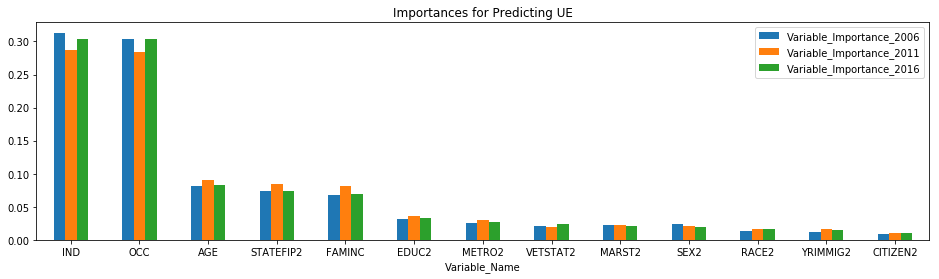

In [51]:
# plot the variable importances
importance_all.plot.bar(x='Variable_Name',rot=0, title = 'Importances for Predicting UE', figsize=(16,4))